# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** Chun-Hung Yeh, Kuan Tung, Zhuoyue Wang

**Team:** Group 5

**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

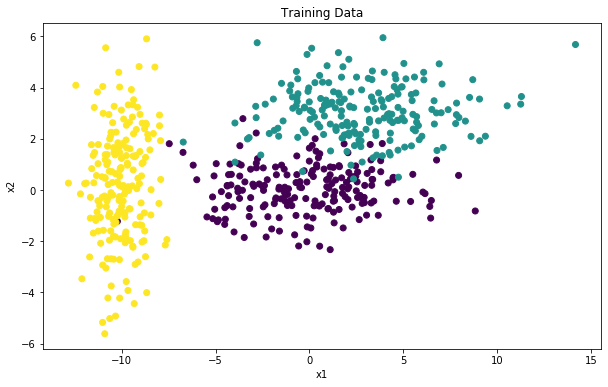

In [4]:
# set up corresponding classes
X = np.concatenate((a, b, c), axis=0)
y = np.concatenate((np.ones(200), 2*np.ones(200), 3*np.ones(200)), axis=0)

# visualize data
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Training Data")
plt.show()

To use Bayes methods for classification, we need the following assumptions.

**Assumptions**: 
- The distributions of all three classes are i.i.d. Gaussian distribution.
- The prior probabilities are equal: $P(w_1) = P(w_2) = P(w_3) = \frac{1}{3}$, since the numbers of data points in three classes are equal.

For each class, we have $n$ data points, then
$$X = 
\left[
\begin{matrix}
 x_{11}      & x_{12}      \\
 x_{21}      & x_{22}      \\
 \vdots & \vdots     \\
 x_{n1}      & x_{n2}      \\
\end{matrix}
\right]$$

Using **maximum likelihood estimator**, the mean value $\mu$ can be estimated as

$$\hat\mu = \left[
\begin{matrix}
 \cfrac{1}{n}\sum_{j=1}^{n}{x_{j1}}      & \cfrac{1}{n}\sum_{j=1}^{n}{x_{j2}}  
\end{matrix}
\right]$$


and the covariance matrix $\Sigma$ can be estimated as

$$\hat\Sigma ＝ \cfrac{1}{n}(X-\hat\mu)^T(X-\hat\mu) \quad \text{with } \hat\Sigma_{12}=\hat\Sigma_{21}=0 \text{ (because of i.i.d. Gaussian assumption)}$$

In [5]:
# compute mean for each class
ua = a.mean(axis=0).round()
ub = b.mean(axis=0).round()
uc = c.mean(axis=0).round()
print('Estimated means: ', ua, ub, uc)

# compute covariance for each class
siga = (np.dot((a-ua).T, a-ua)/a.shape[0]).diagonal().round()
sigb = (np.dot((b-ub).T, b-ub)/b.shape[0]).diagonal().round()
sigc = (np.dot((c-uc).T, c-uc)/c.shape[0]).diagonal().round()
print('Estimated covariances: ', siga, sigb, sigc)

Estimated means:  [-0.  0.] [3. 3.] [-10.   0.]
Estimated covariances:  [10.  1.] [10.  1.] [1. 5.]


The decision curves are computed as followed:
$$\text{For a & b:}\quad \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_1-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_1-\mu_{b2})^2}{\sigma_{b2}^2} $$
$$\text{For a & c:}\quad \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_1-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{c1})^2}{\sigma_{c1}^2} + \cfrac{(x_1-\mu_{c2})^2}{\sigma_{c2}^2} $$
$$\text{For b & c:}\quad \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_1-\mu_{b2})^2}{\sigma_{b2}^2} =  \cfrac{(x_1-\mu_{c1})^2}{\sigma_{c1}^2} + \cfrac{(x_1-\mu_{c2})^2}{\sigma_{c2}^2} $$

Plug in the estimated parameters:
$$\hat\mu_a = [0, 0],\quad \hat\mu_b = [3, 3],\quad \hat\mu_c = [-10, 0]$$
$$\hat\sigma_a^2=[10, 1],\quad \hat\sigma_b^2=[10, 1],\quad \hat\sigma_c^2=[1, 5]$$

We get the three curves as following:

$$\text{For a & b:}\quad 2x_1+20x_2-33=0$$

$$\text{For a & c:}\quad 0.9x_1^2+20x_1-0.8x_2^2+100=0$$

$$\text{For b & c:}\quad 0.9x_1^2+20.6x_1-0.8x_2^2+6x_2+90.1=0$$

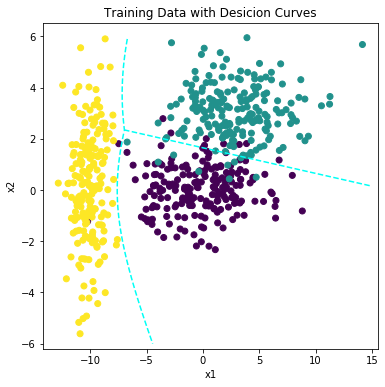

In [6]:
# roughly the intersection point of three decision curves is [-7, 2.3]
abx1 = np.arange(-7, 15, 0.1)
abx2 = np.arange(-6, 6, 0.1)
abX1, abX2 = np.meshgrid(abx1, abx2)
ab = 2*abX1+20*abX2-33

acx1 = np.arange(-15.0, 15, 0.1)
acx2 = np.arange(-6.0, 2.3, 0.1)
acX1, acX2 = np.meshgrid(acx1, acx2)
ac = 0.9*acX1**2+20*acX1-0.8*acX2**2+100

bcx1 = np.arange(-15.0, 15, 0.1)
bcx2 = np.arange(2.3, 6, 0.1)
bcX1, bcX2 = np.meshgrid(bcx1, bcx2)
bc = 0.9*bcX1**2+20.6*bcX1-0.8*bcX2**2+6*bcX2+90.1

# draw decision boundary
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y)
lim = plt.axis()
plt.contour(abX1, abX2, ab, 0, linestyles='dashed', cmap='hsv')
plt.contour(acX1, acX2, ac, 0, linestyles='dashed', cmap='hsv')
plt.contour(bcX1, bcX2, bc, 0, linestyles='dashed', cmap='hsv')
plt.axis(lim)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Training Data with Desicion Curves")
plt.show()

#### Gaussian Naive Bayes by `sklearn`
Apart from the analytical solution, here we apply the standard library to find out the decision boundary.

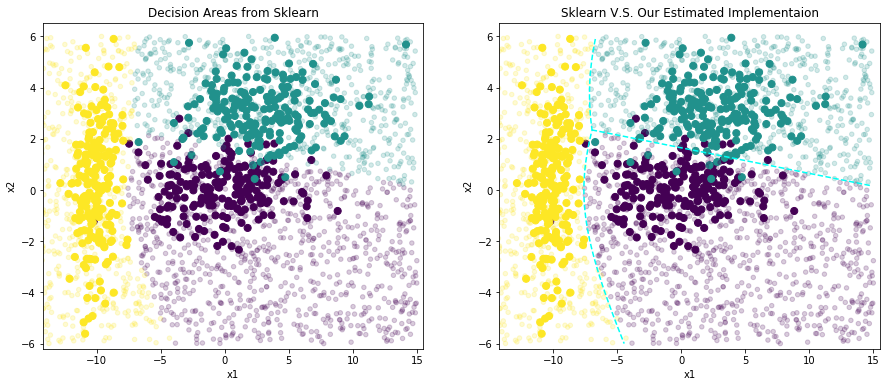

In [7]:
# load model and train
clf = GaussianNB()
clf.fit(X, y)

# generate random points to find out the decision areas
rng = np.random.RandomState(0)
Xnew = [-15, -6] + [30, 12] * rng.rand(2000, 2)
ynew = clf.predict(Xnew)

# visualize
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].scatter(X[:, 0], X[:, 1], c=y, s=50)
lim = ax[0].axis()
ax[0].scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.2)
ax[0].axis(lim)
ax[0].set_title("Decision Areas from Sklearn")
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[1].scatter(X[:, 0], X[:, 1], c=y, s=50)
lim = ax[1].axis()
ax[1].scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.2)
ax[1].contour(abX1, abX2, ab, 0, linestyles='dashed', cmap='hsv')
ax[1].contour(acX1, acX2, ac, 0, linestyles='dashed', cmap='hsv')
ax[1].contour(bcX1, bcX2, bc, 0, linestyles='dashed', cmap='hsv')
ax[1].axis(lim)
ax[1].set_title("Sklearn V.S. Our Estimated Implementaion")
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
plt.show()

As shown above, the decision areas generated by `sklearn` and our estimated implemention are almost the same.

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

We can build the **Minimal Distance Classifier** based on Mahalanobis distance.

The minimal distance classifier is
$$
Class=\left\{
\begin{array}{rcl}
a & & {d_a < d_b}\\
b & & {d_b < d_a}
\end{array} \right.
$$

Mahalanobis distance is defined as:
$
d_m = \left((x-\mu_i)\Sigma_i^{-1}(x-\mu_i)^T\right)^{1/2}
$


The decision curve is where the distances to each class are the same, i.e. $d_a=d_b$.

$$d_a = \left((x-\mu_a)\Sigma_a^{-1}(x-\mu_a)^T\right)^{1/2},  d_b = \left((x-\mu_b)\Sigma_b^{-1}(x-\mu_b)^T\right)^{1/2}$$

$$d_a=d_b \Rightarrow \cfrac{(x_1-\mu_{a1})^2}{\sigma_{a1}^2} + \cfrac{(x_1-\mu_{a2})^2}{\sigma_{a2}^2} =  \cfrac{(x_1-\mu_{b1})^2}{\sigma_{b1}^2} + \cfrac{(x_1-\mu_{b2})^2}{\sigma_{b2}^2}$$

In [8]:
# inverse of covariance matrix for each class
siga_inv = np.linalg.inv(np.diag(siga))
sigb_inv = np.linalg.inv(np.diag(sigb))

print(siga_inv)
print(sigb_inv)

[[0.1 0. ]
 [0.  1. ]]
[[0.1 0. ]
 [0.  1. ]]


As estimated previously, we can get the inversed estimated covarance matrix as
$$
\hat\Sigma_a^{-1}
=
\hat\Sigma_b^{-1}
=
\left[\begin{matrix}
0.1      & 0     \\
0     & 1
\end{matrix}\right]
$$

and estimated mean values of two classes as:
$$\hat\mu_a = [0, 0], \hat\mu_b = [3, 3]$$

Plug in the estimated parameters, the decision curve is given as:
$$2x_1+20x_2-33=0$$

**Comparision**

In the training dataset there are the same number of points of class a and b, which leads to **the same prior probabilities** of two classes.

Thus, in our case, the decision boundary of the Bayes Classifier is the same as that of the Minimal Mahalanobis Distance Classifier.

Now, let's use Mahalanobis distance for classification.

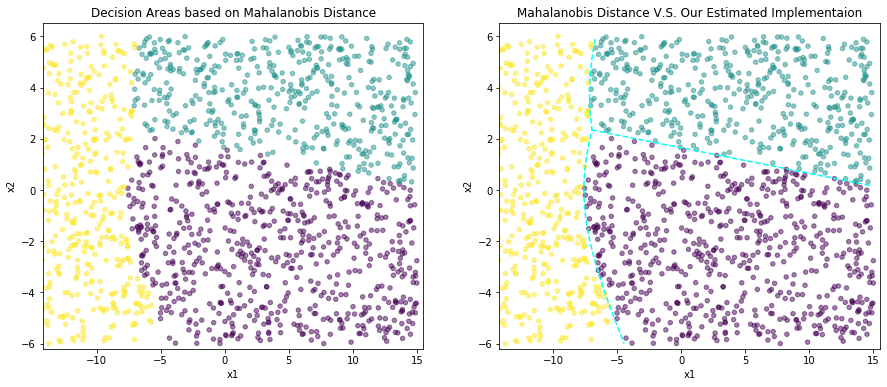

In [9]:
# compute the joint Mahalanobis distance according to all classes
sigc_inv = np.linalg.inv(np.diag(sigc))
da = lambda x: np.sqrt((x-ua).dot(siga_inv).dot((x-ua).T))
db = lambda x: np.sqrt((x-ub).dot(sigb_inv).dot((x-ub).T))
dc = lambda x: np.sqrt((x-uc).dot(sigc_inv).dot((x-uc).T))
clf_m = lambda x: np.argmin([da(x), db(x), dc(x)])

# generate random points to find out the decision areas
rng = np.random.RandomState(0)
Xnew = [-15, -6] + [30, 12] * rng.rand(1500, 2)
ynew = [clf_m(x) for x in Xnew]

# visualize
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.5)
ax[0].axis(lim)
ax[0].set_title("Decision Areas based on Mahalanobis Distance")
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')

ax[1].scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.5)
ax[1].contour(abX1, abX2, ab, 0, linestyles='dashed', cmap='hsv')
ax[1].contour(acX1, acX2, ac, 0, linestyles='dashed', cmap='hsv')
ax[1].contour(bcX1, bcX2, bc, 0, linestyles='dashed', cmap='hsv')
ax[1].axis(lim)
ax[1].set_title("Mahalanobis Distance V.S. Our Estimated Implementaion")
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
plt.show()

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [10]:
import gzip

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [11]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

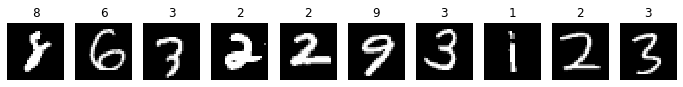

In [12]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*

In [13]:
# helper function
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [14]:
# useful variables
x, y, h = train_images.shape[1]*train_images.shape[-1], len(np.unique(train_labels)), 100
# normalization
train_images_normalized = train_images / 255
test_images_normalized = test_images / 255

# encode labels to vectors
y_train = get_one_hot(train_labels, y)
y_test = get_one_hot(test_labels, y)

# flatten images to 1D
X_train = train_images_normalized.reshape(-1, x)
X_test = test_images_normalized.reshape(-1, x)

In [15]:
from sklearn.neural_network import MLPClassifier

# build MLP
mlp = MLPClassifier(hidden_layer_sizes=(h,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=2, random_state=1,
                    learning_rate_init=.1)

# training
mlp.fit(X_train, y_train)

# show results
print("Mean accuracy (training): %f" % mlp.score(X_train, y_train))
print("Mean accuracy (testing): %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.57392601
Iteration 2, loss = 0.26492191
Iteration 3, loss = 0.20341701
Iteration 4, loss = 0.17182655
Iteration 5, loss = 0.14922503
Iteration 6, loss = 0.13269142
Iteration 7, loss = 0.11979009
Iteration 8, loss = 0.10912481
Iteration 9, loss = 0.09910097
Iteration 10, loss = 0.09110073
Iteration 11, loss = 0.08315204
Iteration 12, loss = 0.07617372
Iteration 13, loss = 0.07097874
Iteration 14, loss = 0.06642126
Iteration 15, loss = 0.06020300
Iteration 16, loss = 0.05625145
Iteration 17, loss = 0.05073363
Iteration 18, loss = 0.04677412
Iteration 19, loss = 0.04322191
Iteration 20, loss = 0.03894905
Iteration 21, loss = 0.03702707
Iteration 22, loss = 0.03323739
Iteration 23, loss = 0.03136558
Iteration 24, loss = 0.02851003
Iteration 25, loss = 0.02676495
Iteration 26, loss = 0.02427982
Iteration 27, loss = 0.02131063
Iteration 28, loss = 0.02053125
Iteration 29, loss = 0.01786672
Iteration 30, loss = 0.01717247
Iteration 31, loss = 0.01497956
Iteration 32, los

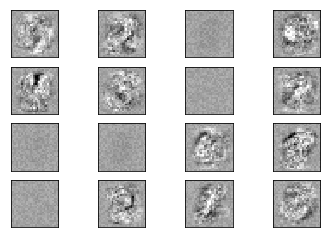

In [16]:
# visualize weights
fig, axes = plt.subplots(4, 4)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Using all training sets for training, we finally got the pretty good result by testing data, achieving approximately 96% mean testing accuracy.